In [8]:
from keras import layers,models,datasets
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

(input_train,y_train),(input_test,y_test)=datasets.imdb.load_data(
    path=r'F:\work\pywork\ipython\python_ml\keras_data\imdb.npz',num_words=max_features)
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)

input_train.shape

(25000, 500)

In [12]:
model=models.Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.SimpleRNN(64))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                6208      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model.fit(
    input_train,y_train,
    epochs=10,batch_size=128,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3221 - acc: 0.8745 - val_loss: 0.5356 - val_acc: 0.8322
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0974 - acc: 0.9656 - val_loss: 0.5716 - val_acc: 0.8184
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0603 - acc: 0.9806 - val_loss: 0.5830 - val_acc: 0.8280
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0745 - acc: 0.9741 - val_loss: 0.7213 - val_acc: 0.7712
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0464 - acc: 0.9844 - val_loss: 0.6947 - val_acc: 0.8078
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0416 - acc: 0.9858 - val_loss: 0.7943 - val_acc: 0.7788
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0295 - acc: 0.9916 - val_loss: 0.8123 - val_acc:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
def plt_loss_acc(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']



    epochs=range(1,len(acc)+1)
    plt.plot(epochs,acc,'bo',label='train_acc')
    plt.plot(epochs,val_acc,'b--',label='val_acc')

    plt.legend()
    plt.figure()
    plt.plot(epochs,loss,'go',label='train_loss')
    plt.plot(epochs,val_loss,'g--',label='val_loss')
    plt.legend()

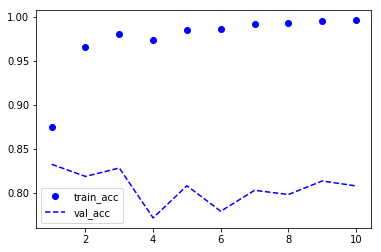

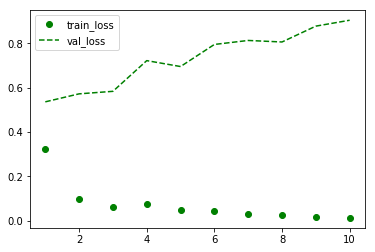

In [16]:
plt_loss_acc(history)